<center>
    <header>
        <h1>Identifying Redditors Who Are Likely to Use Bigoted Language
        </h1>
    </header><br><br>
    <b>Truly, that is a f_____ of epic proportions.</b><br>
    <i>/u/CouchPotatoFamine</i>
<br><br><br><br>
</center>


<center>
    <h1>Why should we care?
    </h1>
<img src='as_a_black_person.jpg' width='200' height='200'>
    <sub>Image found on /r/AsABlackMan</sub>
</center>


<header>
    <center>
        <h1>Where to Find the Data?
        </h1>
    </center>
    <h3>Luckily, there are places like r/AgainstHateSubreddits, where I was able to find:</h3><br>
    <b>
        <ul>
            <li>r/AntiLGBTQIA</li>
            <li>r/HardUnpopularOpinion</li>
            <li>r/DiversityNews</li>
        </ul>
    </b>
</header>


<center>
<header>
    <h1>Limitations of Reddit API</h1>    </header>
</center>
    <ul>
    <b><li>Even without limit, it is only possible to get 1000 comments from a Redditor instance</li><br>
        <li>There are, however, 4 different orderings of comments that one can access: </li>
        <ol>
            <li>controversial</li>
            <li>hot</li>
            <li>new</li>
            <li>top</li>
            </ol></b>
    </ul>


<center><h1>Defining classes / features
    </h1></center>
<ul>
    <li>Get set of all usernames that used slurs</li>
    <li>Target column based on username</li>
</ul>


<center><h1>Feature Engineering</h1>
<br>
    <h3>Auto-encoding
    </h3>
</center>

<center><h1>By next Thursday</h1></center>
<ul>
    <li>Feature encoding my OneHotEncoded n-grams</li>
    <li>Connect s3 bucket to Spark cluster</li>
    <li>Finish building bot, make subreddit for my bot to post stuff</li>
</ul>

<center><h1>End</h1></center>

<center><sub>Special thanks to Evgenij Vasilev, whose Master's Thesis<br> <i>Inferring gender of Reddit Users</i><br>provided some much-needed guidance for the design of this project</sub></center>

<img src='aws_error.png'>

<table>
<tr>
<td>
   <pre lang="csharp">
    def slurred(comment):
    
   </pre>
</td>
<td>
  <pre lang="nemerle">
  def x : int = 3;
  def y : string = "foo";
  def obj : Object = getObject();
  </pre>
</td>
<td>
  Variables defined with <code>def</code> cannot be changed once defined. This is similar to <code>readonly</code> or <code>const</code> in C# or <code>final</code> in Java. Most variables in Nemerle aren't explicitly typed like this.
</td>
</tr>
share

In [125]:
def religion(text):
    if type(text) == str:
        low = text.lower()
        for slur in religious:
            if slur in low:
                return 1
    return 0
def race(text):
    if type(text) == str:
        low = text.lower()
        for slur in racial:
            if slur in low:
                return 1
    return 0
def queer(text):
    if type(text) == str:
        low = text.lower()
        for slur in lgbt:
            if slur in low:
                return 1
    return 0

In [59]:
def first_slur_used(string):
    if type(string) == str:
        low = string.lower()
        for slur in slurs:
            if slur in low:
                return slur
    return 'None'

In [60]:
def all_slurs_used(string):
    used_slurs = []
    if type(string) == str:
        low = string.lower()
        for slur in slurs:
            if slur in low:
                used_slurs.append(slur)
    if len(used_slurs) > 1:
        return ' | '.join(used_slurs)
    elif len(used_slurs) == 1:
        return used_slurs[0]
    else:
        return 'None'

In [121]:
religious = ['christ-killer','christ killer','goy','heeb','hebe',
             'kike','jewboy','kyke','raghead','rag head','shylock',
             'towel head','camel jockey','toucan sam'
            ]
racial = ['gook','ching chong','chink','half-breed', 'half breed',
          'jigaboo','jiggabo', 'jig', 'jigga', 'jigger',
          'jungle buny','niglet','nig-nog', 'nig nog', 'nignog',
          'nigger','nigga', 'nigress', 'niggah', 'nigga','niqq',
          'nigg','porch monkey','raghead', 'rag head', 'sambo',
          'slant-eye', 'slant eye','spic','spick','spik',
          'tar baby', 'tar-baby','tyrone','towel head',
          'uncle tom','wetback','beaner','camel jockey',
          'coon-ass', 'coon','tnb','yard ape','welfare queen',
          'unemployus','three-fifth','three fifths', 
          'three fifth', 'three-fifths','point six', 
          'point-six', '36-30', 'thirty-six-thirty',
          'thirty-six thirty','thirtysix-thirty',
          'thirtysix thirty','satchmo','sambo','race traitor',
          'race-traitor','mammy','pickaninny','sheboon',
          'furfag','chimpout','chimp out'
]

lgbt = ['fag','cocksucker','queer','dyke']


In [122]:
slurs = []
slurs.extend(racial)
slurs.extend(lgbt)
slurs.extend(religious)

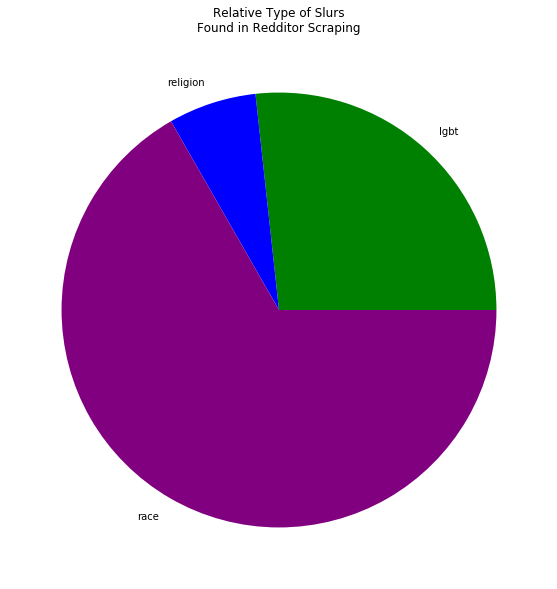

In [159]:
keys = ['lgbt','religious','race']

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))
ax.pie([final_user_data[key].sum() for key in keys],labels=['lgbt','religion','race'],colors=['green','blue','purple'])
ax.set_title('Relative Type of Slurs\nFound in Redditor Scraping')
plt.savefig('slur_fractions.png')

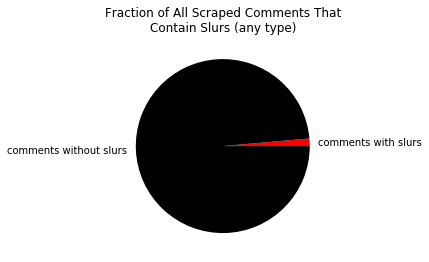

In [170]:
pie = [fresh['slurred'].sum(),fresh.shape[0]-fresh['slurred'].sum()]
plt.pie(pie,labels=['comments with slurs','comments without slurs'],colors=['red','black'])
plt.title('Fraction of All Scraped Comments That\nContain Slurs (any type)')
plt.savefig('all_slurs.png')